## **Supervised Machine Learning (Regression)**
## importing libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Load Data

In [11]:
bs_df=pd.read_csv("/content/drive/MyDrive/boat_data_cleaned.csv")

## Data Wrangling

In [12]:
# drop the indexing column
bs_df=bs_df.drop(["Unnamed: 0"],axis=1)

In [5]:
bs_df.head()

,Unnamed: 0,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country,City,Pricing Category,Boat Class,Total_views
0,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,Low-priced,Class A,203469
1,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,Low-priced,Class A,203469
2,10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Low-priced,Class A,316879
3,12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Low-priced,Class A,116749
4,13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,Low-priced,Class A,316879


In [18]:
#check the rows and columns count
print(bs_df.shape)
print(bs_df.columns)
# check of missing values
missing_data_count=bs_df.isnull().sum()
print(missing_data_count)

(6001, 14)
Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR Price', 'Country',
       'City', 'Pricing Category', 'Boat Class', 'Total_views'],
      dtype='object')
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Number of views last 7 days    0
EUR Price                      0
Country                        0
City                           0
Pricing Category               0
Boat Class                     0
Total_views                    0
dtype: int64


The data explotary analysis of data show the data has no missing values
<br> Next step is to look for duplicates in the data

In [26]:
# Check for duplicates based on all columns
duplicates = bs_df.duplicated()
duplicates_count=bs_df.duplicated().sum()
print(duplicates)
print(".... duplicates count .........")
print(duplicates_count)

0       False
1       False
2       False
3       False
4       False
        ...  
5996    False
5997    False
5998    False
5999    False
6000    False
Length: 6001, dtype: bool
.... duplicates count .........
0


## Visulazations
Checking correlation in the data

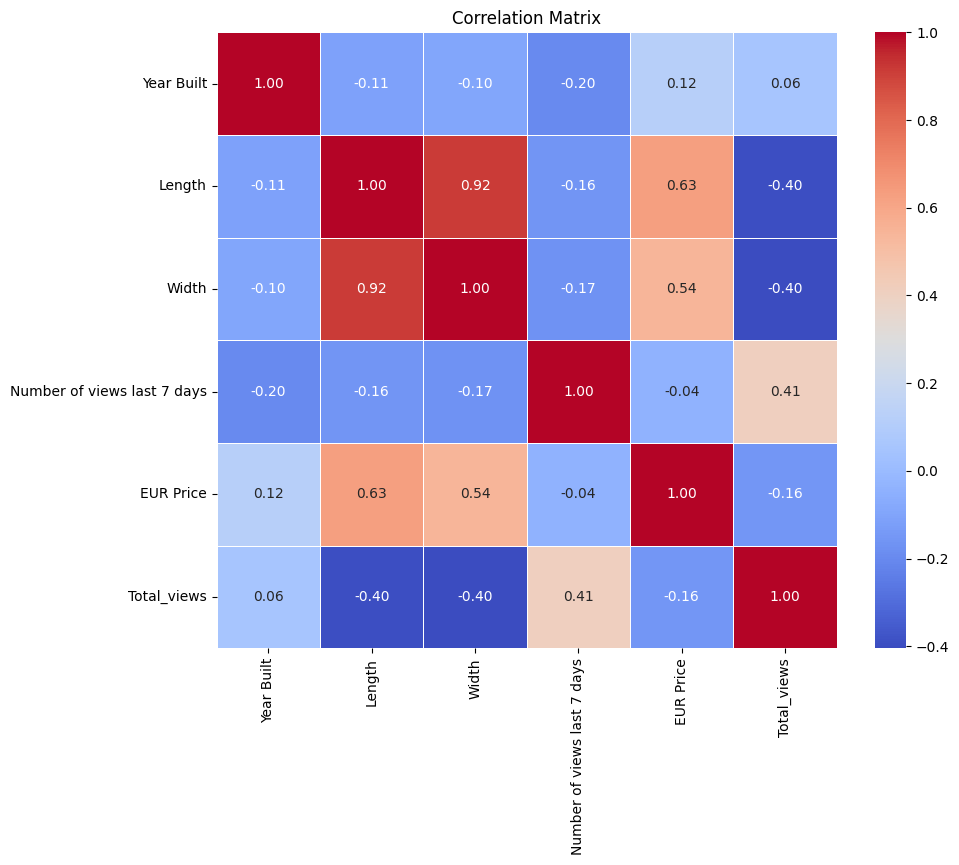

In [31]:
# Select numeric columns for correlation
numeric_columns = bs_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
# Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## **Hypothesis**
####The higher the length of the boat, the higher the price

Basic Analysis

In [33]:
bs_df.describe()

,Year Built,Length,Width,Number of views last 7 days,EUR Price,Total_views
count,6001.000000,6001.000000,6001.000000,6001.00000,6.001000e+03,6001.000000
mean,2006.785202,10.834531,3.393046,165.18047,2.346750e+05,132386.274121
std,12.909093,4.847406,1.071161,171.31140,6.378699e+05,98373.550248
min,1901.000000,2.320000,0.860000,15.00000,3.399000e+03,46.000000
25%,2000.000000,7.350000,2.540000,74.00000,4.290000e+04,60234.000000
50%,2008.000000,9.880000,3.200000,115.00000,8.700000e+04,116749.000000
75%,2018.000000,13.240000,4.100000,193.00000,2.190000e+05,203469.000000
max,2021.000000,56.000000,16.000000,3263.00000,2.350000e+07,316879.000000


## Visualazation of Price in Euros VS the length of the boat which have a high correlation

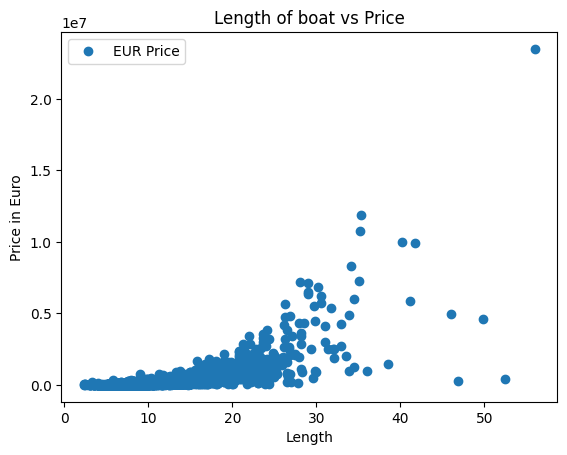

In [35]:
# a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
bs_df.plot(x = 'Length', y='EUR Price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Length of boat vs Price')
plt.xlabel('Length')
plt.ylabel('Price in Euro')
plt.show()

## Preparing the data

In [42]:
# Reshape the variables into NumPy arrays and put them into separate objects.
x = bs_df['Length'].values.reshape(-1,1)
y = bs_df['EUR Price'].values.reshape(-1,1)
# Split data into a training set and a test set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Analysis

In [43]:
#a regression object.
regression = LinearRegression()
# Training the regression Model.
regression.fit(x_train, y_train)
# Predict the values of y using X.
y_predicted = regression.predict(x_test)

##Model predection visualazation

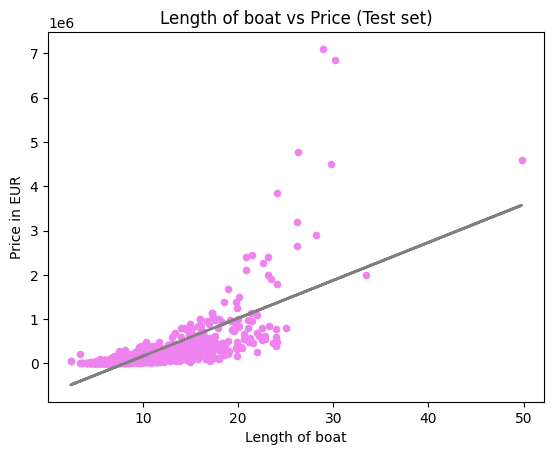

In [55]:
plot_test = plt
plot_test.scatter(x_test, y_test, color='violet', s = 20)
plot_test.plot(x_test, y_predicted, color='grey', linewidth =2)
plot_test.title('Length of boat vs Price (Test set)')
plot_test.xlabel('Length of boat')
plot_test.ylabel('Price in EUR')
plot_test.show()

|the line have a perfect fit of data within the model as it covers most points in the points in the zone. The line is a bit furhter from the data points near the x axis this can be fixe by increasing the test size to reduce the issue of under fitting

##Checking The Accuracy of the Regression Model

In [57]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.
# Print the model summary statistics. This is where you evaluate the performance of the model.
print("..... Accuracy scores .....")
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

..... Accuracy scores .....
Slope: [[85563.12989498]]
Mean squared error:  132432081382.22882
R2 score:  0.4186566126140677


## <center>Interpretation</center>
####1.slope
The slope indicates that for every one-unit increase in the predictor variable, the dependent variable is expected to increase by approximately **85563.13** units. The sign (positive or negative) of the slope indicates the direction of the relationship between the variables.
####2.MSE
The value of MSE is quite large **(132,432,081,382.23)**, indicating a considerable amount of variance in the predictions. Lower MSE values are generally desirable, as they indicate better model performance.
R2 Score: 0.4186566126140677
#### 3.R2 Score
The R2 score (coefficient of determination) is a measure of how well the independent variables explain the variance in the dependent variable. It ranges from 0 to 1, where 1 indicates a perfect fit. In this case, the R2 score is **0.42**, suggesting that approximately 42% of the variance in the dependent variable is explained by the independent variable(s).

## Comparision between Actual Y test values and predicted Values

In [62]:
#Comparision between Actual Y test values and predicted Values
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.tail(30)

,Actual,Predicted
1171,390492.72,1.433389e+05
1172,24378.00,-1.946355e+05
1173,165000.00,3.444122e+05
1174,1795000.00,1.371170e+06
1175,138500.00,8.087780e+04
1176,264950.00,5.369293e+05
1177,44500.00,-1.826566e+05
1178,449000.00,7.936187e+05
1179,365000.00,6.387494e+05
1180,120000.00,3.213102e+05
